# Réaliser une analyse bivariée avec Python

## Qu'est-ce que l'analyse bivariée ?

Après avoir inspecté et décrit les données avec l'analyse univariée et après avoir corrigé les données si nécessaire, on a souvent recourt à l'analyse bivariée. Ce type d'analyse permet de mesurer la présence et la force de la relation entre deux variables. Selon 

## Analyse graphique

In [1]:
import pandas ## Manipuler les données
import numpy ## Faire des calculs sur des matrices
## Pour faire des graphiques :
import matplotlib.pyplot as plt 
import seaborn 

## Faire des tests statistiques
import scipy.stats

Lorsqu'on analyse deux données quantitatives, on commence toujours par faire des graphiques. Les graphiques permettent d'avoir des "soupçons", d'émettre des hypothèques quand à la relation entre deux variables. Une fois les hypothèses réalisées, on effectuer les tests statistiques adaptés à chaque situation.

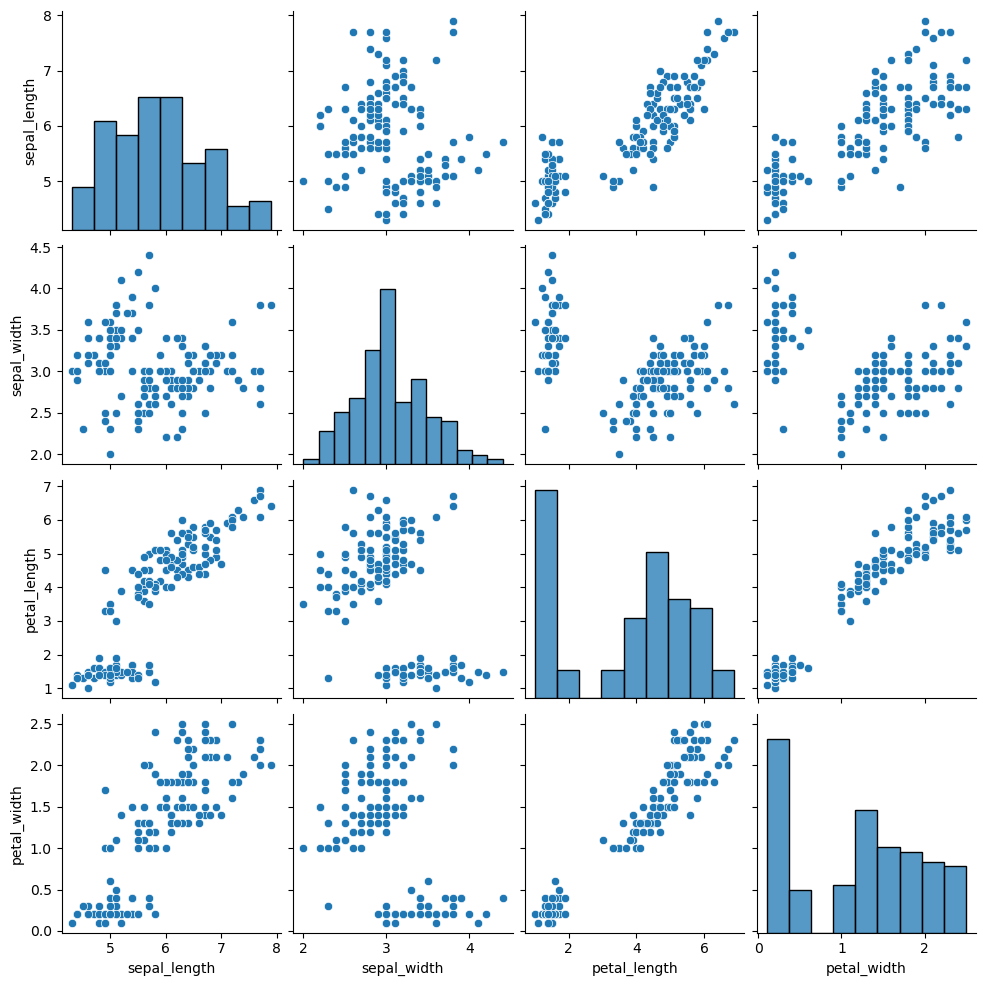

In [2]:
iris=seaborn.load_dataset("iris") ## Charger le jeu de données iris de seaborn.
seaborn.pairplot(iris,kind="scatter") ## réaliser des nuages de points par pair de variables.


Nous sommes à la recherche de relation visiblement linéaire entre nos variables.
Lorsqu'une relation est identifiée entre deux variables, on effectue un test statistique. Faire un test statistique permet de vérifier s'il existe une relation entre deux variables. En fait, il s'agit de rejeter ou non l'indépendance entre deux variables. Dans ce cas, on émet deux hypothèses : 

- H0 : appelée hypothèse nulle. On dit qu'il n'y pas de relation entre les deux variables. Dans ce cas, on dit qu'elles sont indépendantes.
- H1 : appelée hypothèse alternative. On dit qu'il existe une relation entre les deux variables.

A bien avoir en tête : chaque test statistique est caractérisé par :
- deux hypothèses H0 et H1.
- Des conditions d'utilisation **à respecter**.
- Un résultat qui peut être interprété.
- Une p-value, qui indique si le résultat est significatif (<5%) ou non (> 5%).

Il faut donc **adapter son test**.



## Test de corrélation de Pearson

### Hypothèses :
- H0(hypothèse nulle) : Il n'y a pas de corrélation **linéaire** entre les deux variables.
- H1(hypothèse alternative) : Il y a une corrélation **linéaire** entre les deux variables.

### Conditions d'utilisation :
- Les deux variables sont quantitatives et mesurées sur une échelle continue.
- La relation entre les deux variables est linéaire
- Les deux variables suivent une **distribution normale**.


### Interprétation :
Le coefficient de corrélation de pearson varie entre -1 et 1. 

- Si le coefficient est proche de 1 par exemple (0.6), il y a une corrélation positive entre les variables.
- Si le coefficient est proche de -1 (par exemple -0.6), il y a une corrélation négative entre les variables.
- Si le coefficient est proche de 0, il n'y a pas de corrélation linéaire entre les variables.


Il faut ensuite regarder la p-valeur du test :

- Si p < 0.05, on rejette H0 et on conclut qu'il y a une corrélation significative entre les deux variables.
- Si p >= 0.05, on ne peut pas rejeter H0 et on conclut qu'il n'y a pas suffisamment de preuves pour dire qu'il y a une corrélation significative entre les deux variables.



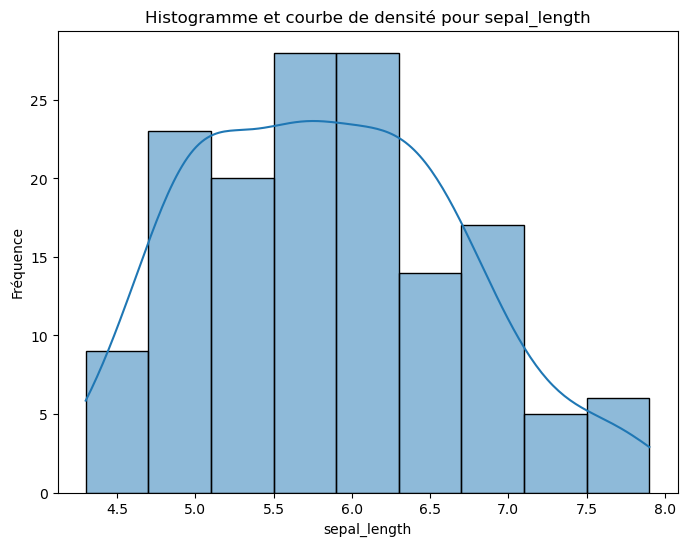

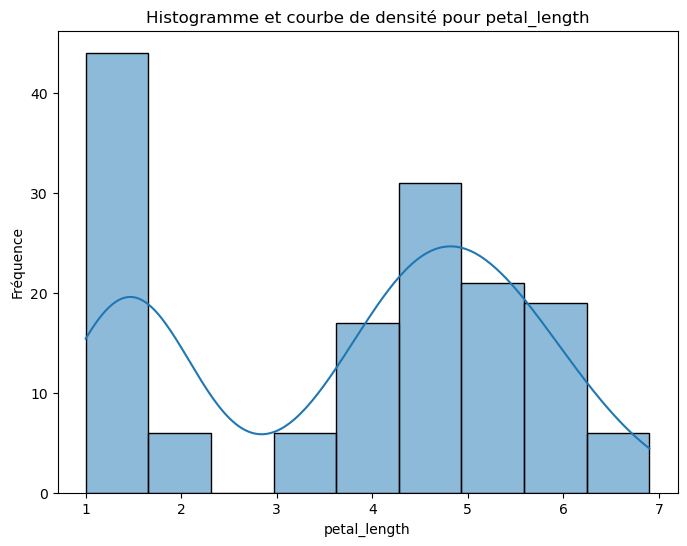

P-valeur de la normalité (Shapiro-Wilk) pour sepal_length: 0.01018026564270258
P-valeur de la normalité (Shapiro-Wilk) pour petal_length: 7.412652158755861e-10


In [3]:
# Analyse de la normalité grâce au test de shapiro (recherche d'une courbe en cloche).
from scipy.stats import shapiro, pearsonr, spearmanr, kendalltau
# Variables quantitatives d'intérêt
var1 = 'sepal_length'
var2 = 'petal_length'

# Analyse graphique de la normalité des deux variables
for var in [var1, var2]:
    plt.figure(figsize=(8, 6))
    seaborn.histplot(iris[var], kde=True)
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.title(f"Histogramme et courbe de densité pour {var}")
    plt.show()

# Vérifier la normalité à l'aide du test de Shapiro-Wilk
for var in [var1, var2]:
    _, p_value = shapiro(iris[var])
    print(f"P-valeur de la normalité (Shapiro-Wilk) pour {var}:", p_value)



Aucune de ces distributions n'est normale. On réalise quand-même un test de Shapiro-Wilk. Si la p-value est inférieure à 0,05, alors la distribution n'est pas normale. et dans ce cas, le test de Pearson ne propose pas de résultat valide.

In [4]:
# Calculer les coefficients de corrélation de Spearman, Pearson et Kendall
pearsonr(iris[var1], iris[var2])
## On peut néanmoins le faire. Bien que sa p-valeur est inféireure au seuil de 5%, et que donc le résultat est significatif,
##+ la normalité des variables n'est pas assurée. Ce qui rend ce test invalide.

PearsonRResult(statistic=0.8717537758865832, pvalue=1.0386674194497525e-47)

Lorsque les variables n'ont pas de distributions normales, on a recourt à des tests dit "non-paramétriques".

## Corrélation de Spearman

### Hypothèses :
- H0 : Il n'y a pas de corrélation **monotone** entre les deux variables.
- H1 : Il y a une corrélation monotone entre les deux variables.

### Conditions d'utilisation :
- Les deux variables sont quantitatives ou **ordinales**.
- Les données n'ont pas besoin d'être normalement distribuées.
- La relation entre les variables peut être monotone (linéaire ou non linéaire).



### Interprétation :
Le coefficient de corrélation de Spearman varie entre -1 et 1. 

- Si le coefficient est proche de 1 par exemple (0.6), il y a une corrélation positive entre les variables.
- Si le coefficient est proche de -1 (par exemple -0.6), il y a une corrélation négative entre les variables.
- Si le coefficient est proche de 0, il n'y a pas de  **corrélation monotone (linéaire ou non linéaire)** entre les variables.


Vous pouvez aussi regarder la pvaleur du test:

- Si p < 0.05, on rejette H0 et on conclut qu'il y a une corrélation monotone significative entre les deux variables.
- Si p >= 0.05, on ne peut pas rejeter H0 et on conclut qu'il n'y a pas suffisamment de preuves pour dire qu'il y a une corrélation monotone significative entre les deux variables.

In [5]:
# Corrélation de spearman

spearmanr(iris[var1], iris[var2])


SpearmanrResult(correlation=0.881898126434986, pvalue=3.4430872780470036e-50)

## Test de corrélation de Kendall

### Hypothèses :
- H0 : Il n'y a pas de **corrélation monotone** entre les deux variables.
- H1 : Il y a une corrélation monotone entre les deux variables.

### Conditions d'utilisation :
- Les deux variables sont quantitatives ou ordinales.
- Les données n'ont pas besoin d'être normalement distribuées.
- La relation entre les variables peut être monotone (linéaire ou non linéaire).


### Interprétation :

Le coefficient de corrélation de Kendall varie entre -1 et 1. 
- Si le coefficient est proche de 1 (un seuil à 70%) , il y a une corrélation positive entre les variables.
- Si le coefficient est proche de -1, il y a une corrélation négative entre les variables.
- Si le coefficient est proche de 0, il n'y a pas de corrélation monotone entre les variables



- Si p < 0.05, on rejette H0 et on conclut qu'il y a une corrélation monotone significative entre les deux variables.
- Si p >= 0.05, on ne peut pas rejeter H0 et on conclut qu'il n'y a pas suffisamment de preuves pour dire qu'il y a une corrélation monotone significative entre les deux variables.


In [6]:
# Calcul de la corrélation de kendall
kendalltau(iris[var1], iris[var2])

KendalltauResult(correlation=0.7185159275387326, pvalue=1.1691259442824266e-36)

# Analyse de la liaison entre deux variables qualitatives

Dans cette partie, nous allons explorer différents tests **d'association** pour étudier la relation entre deux variables qualitatives. Nous utiliserons les tests du chi-carré (chi2) et de Cramér-V. Nous utiliserons le jeu de données "Titanic" populaire pour démontrer l'application de ces tests en Python.


In [2]:
#Analyse graphique entre sex et class de titanic 
titanic=seaborn.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


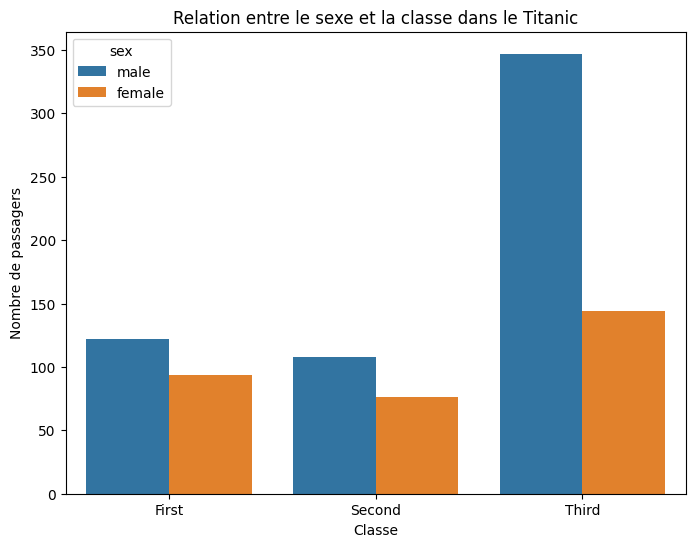

In [3]:
# Créer un graphique de la relation entre 'sex' et 'class' dans Titanic
plt.figure(figsize=(8, 6))
seaborn.countplot(data=titanic, x='class', hue='sex')
plt.xlabel('Classe')
plt.ylabel('Nombre de passagers')
plt.title('Relation entre le sexe et la classe dans le Titanic')
plt.show()


## 1. Test du chi-carré (chi2)

### Hypothèses
- H0 (hypothèse nulle): Il n'y a pas d'association entre les deux variables qualitatives.
- H1 (hypothèse alternative): Il y a une association entre les deux variables qualitatives.

### Conditions d'utilisation
- Les deux variables sont qualitatives (catégorielles).
- Les effectifs attendus sont supérieurs à 5 pour chaque croissement de variable
- Avant de réaliser le test, il faut réaliser un tableau de contingence. Le tableau de contingence permet de compter le nombre d'individus pour chaque catégorie. PAr exemple, ici, on aura :
- deux lignes qui distinguent homme et femme,
- une colonne pour chaque classe.
- A l'intersection de chaque ligne et chaque colonne, l'effectif associé.

### Interprétation
Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on conclut qu'il y a une association entre les deux variables qualitatives.



In [8]:
# Calcul de chi deux sur la base titanic
from scipy.stats import chi2_contingency
# Créer un tableau de contingence
contingency_table = pandas.crosstab(titanic['sex'], titanic['class'])
contingency_table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


In [9]:

# Effectuer le test du chi-carré
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

# Afficher les résultats
print("Statistique du chi-carré :", chi2_stat)
print("P-valeur :", p_value)
print("Degrés de liberté :", dof)
print("Fréquences attendues :\n", expected_freq)


Statistique du chi-carré : 16.971499095517114
P-valeur : 0.00020638864348233114
Degrés de liberté : 2
Fréquences attendues :
 [[ 76.12121212  64.84399551 173.03479237]
 [139.87878788 119.15600449 317.96520763]]



## 2. Coefficient de Cramér-V

Le coefficient de Cramér-V mesure la force de l'association entre deux variables qualitatives. Il varie entre 0 (pas d'association) et 1 (association parfaite).

### Conditions d'utilisation
- Les deux variables sont qualitatives (catégorielles).
- Le test du chi-carré a déjà été effectué et a montré une association significative entre les deux variables.

### Interprétation
Plus la valeur de **Cramér-V est proche de 1 (supérieur à 0.60)**, plus l'association entre les deux variables est forte.

In [10]:
# Calculer le coefficient de Cramér-V
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramer_v = numpy.sqrt(chi2_stat / (n * min_dim))

# Afficher le coefficient de Cramér-V
print("Coefficient de Cramér-V :", cramer_v)

Coefficient de Cramér-V : 0.1380133986221395


## Coefficient T de Tschuprow

Le coefficient T de Tschuprow est une mesure de liaison entre deux variables qualitatives. Il est basé sur le chi-carré (χ²) et prend en compte la taille de l'échantillon et le nombre de catégories dans chaque variable.

### Hypothèses
- H0 (hypothèse nulle): Il n'y a pas de relation entre les deux variables qualitatives.
- H1 (hypothèse alternative): Il y a une relation entre les deux variables qualitatives.

### Conditions d'utilisation
- Les variables sont qualitatives.
- Les observations sont indépendantes.
- Les effectifs des cellules du tableau de contingence sont suffisants (généralement, chaque cellule doit avoir un effectif d'au moins 5).

### Interprétation
Le coefficient T de Tschuprow varie entre 0 et 1. Une valeur proche de 0 indique une faible liaison entre les deux variables, tandis qu'une valeur proche de 1 indique une liaison forte. La force de la liaison dépend du contexte et de la discipline, mais en général, une valeur supérieure à 0,3 est considérée comme une liaison modérée et une valeur **supérieure à 0,5 est considérée comme une liaison forte**.

In [11]:
# Calculer le coefficient T de Tschuprow
n = titanic.shape[0]
min_dim = min(contingency_table.shape) - 1
# Effectuer le test du chi-carré
chi2, p_value, _, _ = scipy.stats.chi2_contingency(contingency_table)
tschuprow_t = numpy.sqrt(chi2 / (n * min_dim))

print("Coefficient T de Tschuprow :", tschuprow_t)
print("P-valeur :", p_value)

Coefficient T de Tschuprow : 0.1380133986221395
P-valeur : 0.00020638864348233114


# Analyse de la liaison entre une variable qualitative et une variable quantitative

Dans cette, nous allons explorer différents tests pour étudier la liaison entre une variable qualitative et une variable quantitative. Nous utiliserons les tests de Student (t-test), ANOVA, Mann-Whitney, Kruskal-Walli. Nous utiliserons le jeu de données "Iris" populaire pour démontrer l'application de ces tests en Python.

## Analyse graphique

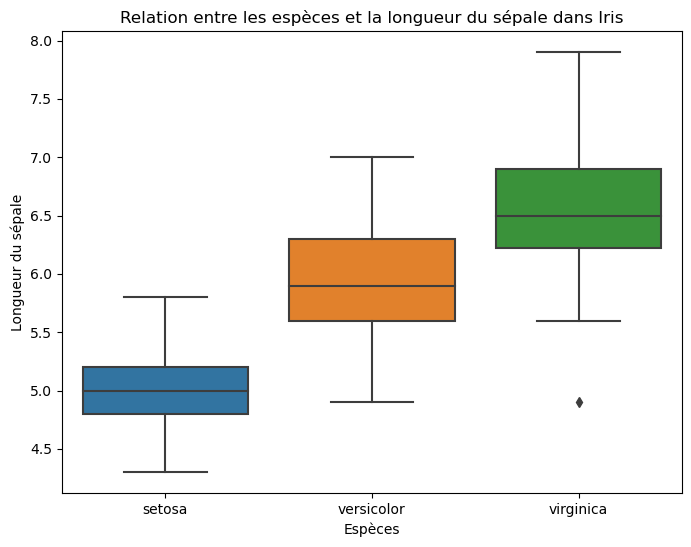

In [12]:

# Créer un boxplot de la relation entre 'species' et 'sepal_length' dans Iris
plt.figure(figsize=(8, 6))
seaborn.boxplot(data=iris, x='species', y='sepal_length')
plt.xlabel('Espèces')
plt.ylabel('Longueur du sépale')
plt.title('Relation entre les espèces et la longueur du sépale dans Iris')
plt.show()



##  Test de Student (t-test)

### Hypothèses
- H0 (hypothèse nulle): Les **moyennes** des deux groupes sont égales.
- H1 (hypothèse alternative): Les moyennes des deux groupes sont différentes.

### Conditions d'utilisation
- La variable quantitative est **normalement** distribuée dans chaque groupe.
- **Les variances des deux groupes sont égales**.
- Les observations sont indépendantes.

### Interprétation
Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on conclut que les moyennes des deux groupes sont significativement différentes.



In [13]:
from scipy.stats import ttest_ind, f_oneway, mannwhitneyu, kruskal, wilcoxon

# Charger le jeu de données Iris
iris = seaborn.load_dataset('iris')

# Séparer les données en deux groupes pour le test de Student et le test de Mann-Whitney
setosa = iris[iris['species'] == 'setosa']['sepal_length']
virginica = iris[iris['species'] == 'virginica']['sepal_length']




P-valeur de la normalité (Shapiro-Wilk) - Setosa: 0.4595010578632355
P-valeur de la normalité (Shapiro-Wilk) - Virginica: 0.25831347703933716
P-valeur de la normalité (Shapiro-Wilk) - Versicolor: 0.4647378921508789


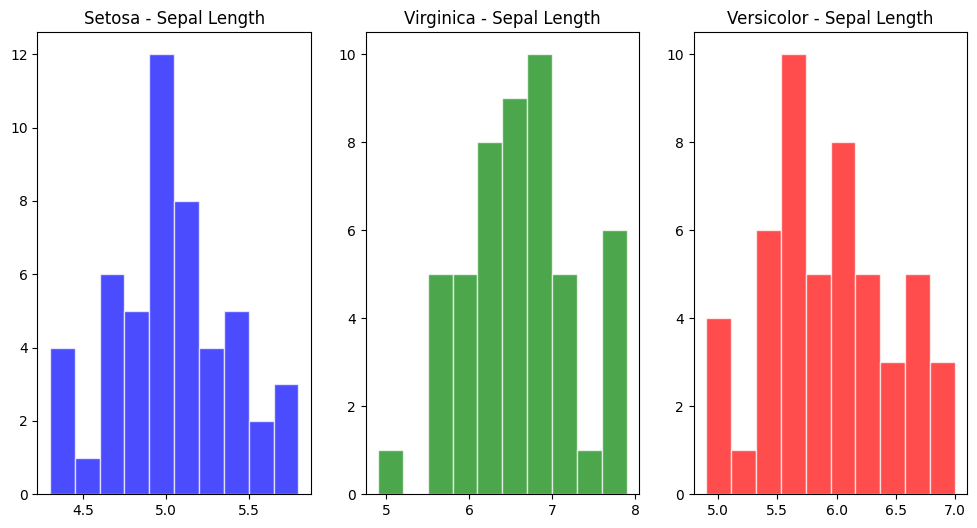

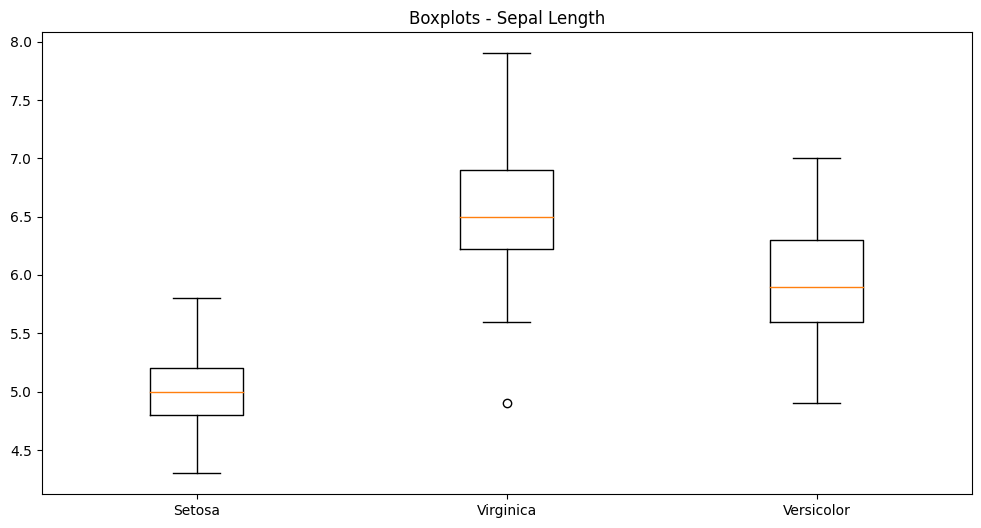

In [5]:
## Vérification de la normalité

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_ind, f_oneway, mannwhitneyu, kruskal

# Charger le jeu de données Iris
iris = seaborn.load_dataset('iris')

# Séparer les données en groupes en fonction de l'espèce
setosa = iris[iris['species'] == 'setosa']['sepal_length']
virginica = iris[iris['species'] == 'virginica']['sepal_length']
versicolor = iris[iris['species'] == 'versicolor']['sepal_length']

# Vérifier la normalité à l'aide du test de Shapiro-Wilk
_, setosa_p_value = shapiro(setosa)
_, virginica_p_value = shapiro(virginica)
_, versicolor_p_value = shapiro(versicolor)

print("P-valeur de la normalité (Shapiro-Wilk) - Setosa:", setosa_p_value)
print("P-valeur de la normalité (Shapiro-Wilk) - Virginica:", virginica_p_value)
print("P-valeur de la normalité (Shapiro-Wilk) - Versicolor:", versicolor_p_value)

# Histogrammes pour vérifier visuellement la normalité
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.hist(setosa, bins=10, color='blue', edgecolor="white", alpha=0.7)
plt.title("Setosa - Sepal Length")
plt.subplot(132)
plt.hist(virginica, bins=10, color='green', edgecolor="white", alpha=0.7)
plt.title("Virginica - Sepal Length")
plt.subplot(133)
plt.hist(versicolor, bins=10, color='red', edgecolor="white", alpha=0.7)
plt.title("Versicolor - Sepal Length")
plt.show()

# Boîtes à moustaches pour vérifier visuellement la normalité
plt.figure(figsize=(12, 6))
plt.boxplot([setosa, virginica, versicolor], labels=['Setosa', 'Virginica', 'Versicolor'])
plt.title("Boxplots - Sepal Length")
plt.show()


In [19]:

# Test de Student (t-test)
t_stat, t_p_value = ttest_ind(setosa, virginica)
print("Statistique t de Student :", t_stat)
print("P-valeur (t-test) :", t_p_value)

Statistique t de Student : -15.386195820079404
P-valeur (t-test) : 6.892546060674059e-28


##  Test de Mann-Whitney

### Hypothèses
- H0 (hypothèse nulle): Les distributions des deux groupes sont égales.
- H1 (hypothèse alternative): Les distributions des deux groupes sont différentes.

### Conditions d'utilisation
- Les observations sont indépendantes.
- Les données peuvent être ordonnées (au moins ordinale).


In [20]:
# Test de Mann-Whitney
mann_whitney_stat, mann_whitney_p_value = mannwhitneyu(setosa, virginica)
print("Statistique U de Mann-Whitney :", mann_whitney_stat)
print("P-valeur (Mann-Whitney) :", mann_whitney_p_value)


Statistique U de Mann-Whitney : 38.5
P-valeur (Mann-Whitney) : 6.396699069396538e-17


## ANOVA (Analysis of Variance)

### Hypothèses
- H0 (hypothèse nulle): Les moyennes de tous les groupes sont égales.
- H1 (hypothèse alternative): Au moins une des moyennes des groupes est différente des autres.

### Conditions d'utilisation
- La variable quantitative est normalement distribuée dans chaque groupe.
- Les variances des groupes sont égales.
- Les observations sont indépendantes.

### Interprétation
Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on conclut qu'au moins une des moyennes des groupes est significativement différente des autres.


### Interprétation
Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on conclut que les distributions des deux groupes sont significativement différentes.



In [21]:
# ANOVA
anova_stat, anova_p_value = f_oneway(setosa, virginica, versicolor)
print("Statistique F de l'ANOVA :", anova_stat)
print("P-valeur (ANOVA) :", anova_p_value)

Statistique F de l'ANOVA : 119.26450218450468
P-valeur (ANOVA) : 1.6696691907693826e-31


### Test de Levene pour l'égalité des variances

Le test de Levene est utilisé pour vérifier **l'hypothèse d'égalité des variances** entre plusieurs groupes. Il est particulièrement utile après l'ANOVA pour vérifier l'hypothèse d'homoscédasticité.

## Hypothèses
- H0 (hypothèse nulle): Les variances des différents groupes sont égales.
- H1 (hypothèse alternative): Au moins une des variances des différents groupes est différente.

## Conditions d'utilisation
- Les échantillons sont indépendants.
- Les observations dans chaque groupe sont indépendantes et identiquement distribuées.

## Interprétation
Si la p-valeur est inférieure à un seuil de signification prédéfini (par exemple, 0,05), on rejette l'hypothèse nulle et on conclut que les variances ne sont pas égales entre les groupes.

In [22]:
from scipy.stats import levene

# Test de Levene pour l'égalité des variances
levene_stat, levene_p_value = levene(setosa, virginica, versicolor)
print("Statistique W de Levene :", levene_stat)
print("P-valeur (Levene) :", levene_p_value)

Statistique W de Levene : 6.35272002048269
P-valeur (Levene) : 0.0022585277836218586


## Test de Kruskal-Wallis

### Hypothèses
- H0 (hypothèse nulle): Les distributions de tous les groupes sont égales.
- H1 (hypothèse alternative): Au moins une des distributions des groupes est différente des autres.

### Conditions d'utilisation
- Les observations sont indépendantes.
- Les données peuvent être ordonnées (au moins ordinale).

In [23]:
# Test de Kruskal-Wallis

kruskal_stat, kruskal_p_value = kruskal(setosa, virginica, versicolor)
print("Statistique H de Kruskal-Wallis :", kruskal_stat)
print("P-valeur (Kruskal-Wallis) :", kruskal_p_value)

Statistique H de Kruskal-Wallis : 96.93743600064833
P-valeur (Kruskal-Wallis) : 8.91873433246198e-22
